## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)
topten = pd.read_csv("/mnt/workstation/data/Input_Topten.csv")
middleten = pd.read_csv("/mnt/workstation/data/Aggregate_20_30.csv")
lastten = pd.read_csv("/mnt/workstation/data/Aggregate_last_10_v2.csv")
labels = pd.read_csv("/mnt/workstation/data/labels.csv")

In [3]:
topten.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses_x',
       'cant_moras_60_ult_12_meses', 'cant_moras_30_ult_12_meses_y',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'nivel_academico',
       'profesion', 'ocupacion', 'tipo_vivienda', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'cat_ingreso', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [4]:
middleten.columns

Index(['Unnamed: 0', 'id_cli', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'periodo', 'ctas_activas',
       'ctas_embargadas', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio'],
      dtype='object')

In [5]:
lastten.columns

Index(['Unnamed: 0', 'id_cli', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar'],
      dtype='object')

In [10]:
topten.shape

(1047955, 34)

In [11]:
df_Xcli = topten.merge(middleten, on="id_cli", how='left')
df_Xcli.shape

(1047955, 53)

In [12]:
df_Xcli = df_Xcli.merge(lastten, on="id_cli", how='left')
df_Xcli.shape

(1092553, 62)

Text(199.0, 0.5, 'rows')

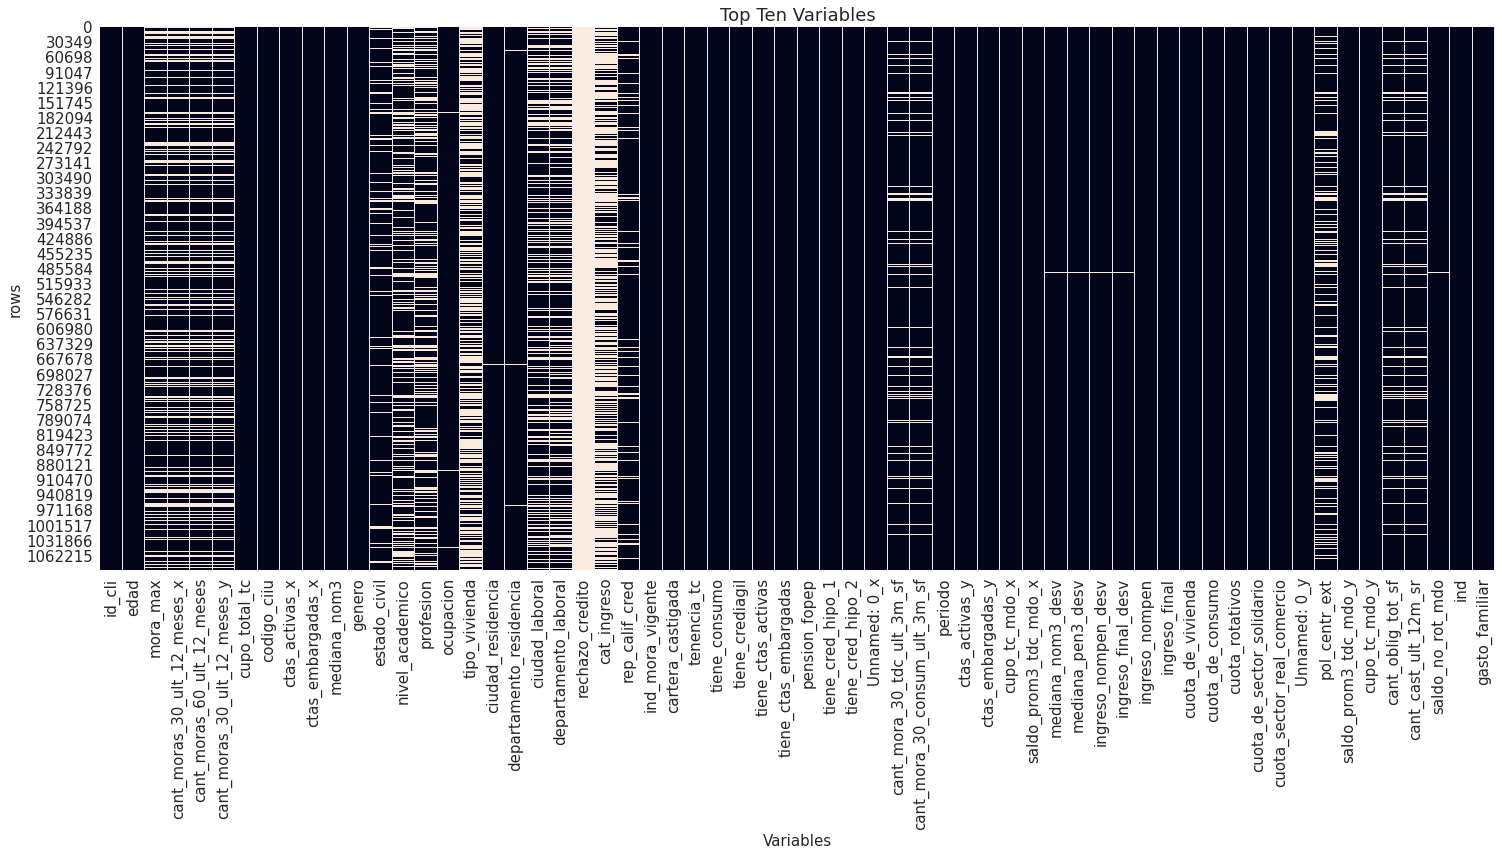

In [13]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
sns.heatmap(df_Xcli.isnull(), cbar=False)
plt.title("Top Ten Variables")
plt.xlabel('Variables')
plt.ylabel('rows')

In [14]:
100*df_Xcli.isnull().sum()/topten.shape[0]

id_cli                           0.000000
edad                             0.000000
mora_max                        24.378719
cant_moras_30_ult_12_meses_x    24.378719
cant_moras_60_ult_12_meses      24.378719
                                  ...    
cant_oblig_tot_sf               10.150054
cant_cast_ult_12m_sr            10.150054
saldo_no_rot_mdo                 0.161839
ind                              0.000000
gasto_familiar                   0.000000
Length: 62, dtype: float64